# ML 2024, 3821Б1ФИ3, Садиков Дамир, Lab №1, Lab №4


dataset: https://www.kaggle.com/datasets/adityaramachandran27/world-air-quality-index-by-city-and-coordinates/data

Таблица содержит информацию о загрязнении воздуха в различных городах стран мира. Решим задачу классификации категории загрязенности воздуха на основе параметров из таблицы: координат города, характеристик воздуха.


## Подключение необходимых библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

## Чтение данных в **data_raw**

In [2]:
from google.colab import files
uploaded = files.upload()
import io
data_raw = pd.read_csv(io.BytesIO(uploaded['AQI and Lat Long of Countries.csv']))

Saving AQI and Lat Long of Countries.csv to AQI and Lat Long of Countries.csv


## Характеристики таблицы

In [3]:
data_raw.shape

(16695, 14)

In [4]:
data_raw.sample(5)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
5171,Poland,Krosno,53,Moderate,1,Good,32,Good,1,Good,53,Moderate,49.6833,21.7500
10461,Germany,Buxtehude,45,Good,1,Good,45,Good,0,Good,24,Good,53.4769,9.7011
13617,India,Madanpur,217,Very Unhealthy,4,Good,99,Moderate,4,Good,217,Very Unhealthy,24.6554,84.5844
13605,United States of America,North Babylon,56,Moderate,1,Good,25,Good,14,Good,56,Moderate,40.7314,-73.3248
9393,United States of America,Port Arthur,29,Good,0,Good,24,Good,3,Good,29,Good,29.8554,-93.9264


In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB


Признаки:

0. `Country` - Country Name
0. `City` - City Name
0. `AQI Value` - AQI Value
0. `AQI Category` - AQI Category
0. `CO AQI Value` - Carbon Monoxide Value
0. `CO AQI Category` - Carbon Monoxide Category
0. `Ozone AQI Value` - Ozone Value
0. `Ozone AQI Category` - Ozone Category
0. `NO2 AQI Value` - Nitrogen Dioxide Value
0. `NO2 AQI Category`- Nitrogen Dioxide Category
0. `PM2.5 AQI Value` - Fine particulate matter less than 2.5 micrometers in diameter value
0. `PM2.5 AQI Category` - Fine particulate matter less than 2.5 micrometers in diameter category
0. `lat` - Latitude of the city
0. `lng` - Longitude of the city

## Обработаем пропущенные значения

In [6]:
data_raw.isna().sum()

,0
Country,302
City,0
AQI Value,0
AQI Category,0
CO AQI Value,0
CO AQI Category,0
Ozone AQI Value,0
Ozone AQI Category,0
NO2 AQI Value,0
NO2 AQI Category,0


In [7]:
data_raw[data_raw.isna().any(axis=1)]

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
385,NaN,Granville,30,Good,1,Good,30,Good,3,Good,25,Good,48.8381,-1.5869
560,NaN,Kingstown,163,Unhealthy,0,Good,25,Good,0,Good,163,Unhealthy,13.1578,-61.2250
623,NaN,Nanakuli,30,Good,0,Good,27,Good,0,Good,30,Good,21.3892,-158.1445
629,NaN,Lavagna,55,Moderate,1,Good,38,Good,2,Good,55,Moderate,44.3167,9.3333
664,NaN,Ladispoli,48,Good,1,Good,48,Good,2,Good,34,Good,41.9544,12.0742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16267,NaN,Tiverton,32,Good,1,Good,24,Good,7,Good,32,Good,41.6090,-71.1741
16279,NaN,Sorrento,61,Moderate,1,Good,45,Good,3,Good,61,Moderate,40.6278,14.3736
16456,NaN,Bima,25,Good,1,Good,25,Good,0,Good,24,Good,-8.4600,118.7267
16594,NaN,Marapanim,25,Good,1,Good,15,Good,0,Good,25,Good,-0.7139,-47.6939


Пропущено несколько названий стран. Существенные параметры при этом не пропущены. Позднее при классификации не будем учитывать параметр страны, поэтому пропущенные значения не влияют на нашу задачу. Можно не удалять и не восстанавливать значения

## Обработка категориальных признаков

In [8]:
str_columns = ['Country', 'City']
cat_columns = ['AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category']
data_raw[str_columns] = data_raw[str_columns].astype('string')
data_raw[cat_columns] = data_raw[cat_columns].astype('category')

In [9]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Country             16393 non-null  string  
 1   City                16695 non-null  string  
 2   AQI Value           16695 non-null  int64   
 3   AQI Category        16695 non-null  category
 4   CO AQI Value        16695 non-null  int64   
 5   CO AQI Category     16695 non-null  category
 6   Ozone AQI Value     16695 non-null  int64   
 7   Ozone AQI Category  16695 non-null  category
 8   NO2 AQI Value       16695 non-null  int64   
 9   NO2 AQI Category    16695 non-null  category
 10  PM2.5 AQI Value     16695 non-null  int64   
 11  PM2.5 AQI Category  16695 non-null  category
 12  lat                 16695 non-null  float64 
 13  lng                 16695 non-null  float64 
dtypes: category(5), float64(2), int64(5), string(2)
memory usage: 1.2 MB


## Рассмотрим характеристики признаков

In [10]:
data_raw.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
count,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000
mean,62.998682,1.342138,31.767355,3.819647,59.821324,30.267148,-3.944485
std,43.091971,2.371379,22.839343,5.880677,43.208298,22.947398,73.037148
min,7.000000,0.000000,0.000000,0.000000,0.000000,-54.801900,-171.750000
25%,38.500000,1.000000,20.000000,0.000000,34.000000,16.515450,-75.180000
50%,52.000000,1.000000,29.000000,2.000000,52.000000,38.815800,5.643100
75%,69.000000,1.000000,38.000000,5.000000,69.000000,46.683300,36.275000
max,500.000000,133.000000,222.000000,91.000000,500.000000,70.767000,178.017800


In [11]:
data_raw.describe(include=['category'])

,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
count,16695,16695,16695,16695,16695
unique,6,3,5,2,6
top,Good,Good,Good,Good,Good
freq,7708,16691,15529,16684,7936


In [12]:
data_raw.describe(include=['string'])

,Country,City
count,16393,16695
unique,174,14229
top,United States of America,Santa Cruz
freq,3954,17


Подозрение на повторяющиеся ячейки с одинаковыми города, рассмотрим подробнее

In [13]:
data_raw[data_raw.duplicated(subset=['City'])].sort_values("City")

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
10545,Mexico,Abasolo,53,Moderate,1,Good,28,Good,3,Good,53,Moderate,24.0559,-98.3733
7128,Kazakhstan,Abay,42,Good,1,Good,35,Good,0,Good,42,Good,43.2092,76.7603
15802,United States of America,Abbeville,41,Good,1,Good,23,Good,2,Good,41,Good,29.9751,-92.1265
8081,United States of America,Aberdeen,39,Good,1,Good,39,Good,1,Good,27,Good,45.4649,-98.4686
8082,United States of America,Aberdeen,39,Good,1,Good,39,Good,1,Good,27,Good,40.4165,-74.2249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16155,Mexico,Zaragoza,49,Good,1,Good,20,Good,6,Good,49,Good,28.4869,-100.9175
13463,Russian Federation,Zarechnyy,41,Good,1,Good,41,Good,0,Good,28,Good,56.8167,61.3333
4483,Russian Federation,Zheleznogorsk,42,Good,1,Good,33,Good,0,Good,42,Good,56.2500,93.5333
174,China,Zhongshan,98,Moderate,3,Good,33,Good,9,Good,98,Moderate,34.9430,105.8771


In [14]:
data_raw[data_raw.duplicated(subset=['City', 'lat', 'lng'])].sort_values("City")

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng


Cудя по тому что повторяются только названия городов, а не координаты, можно сделать вывод что города просто имеют одинаковые названия. При решении задачи названия городов тоже не будут учитываться (так как они не влияют на исследуемую характеристику)

## Визуализация

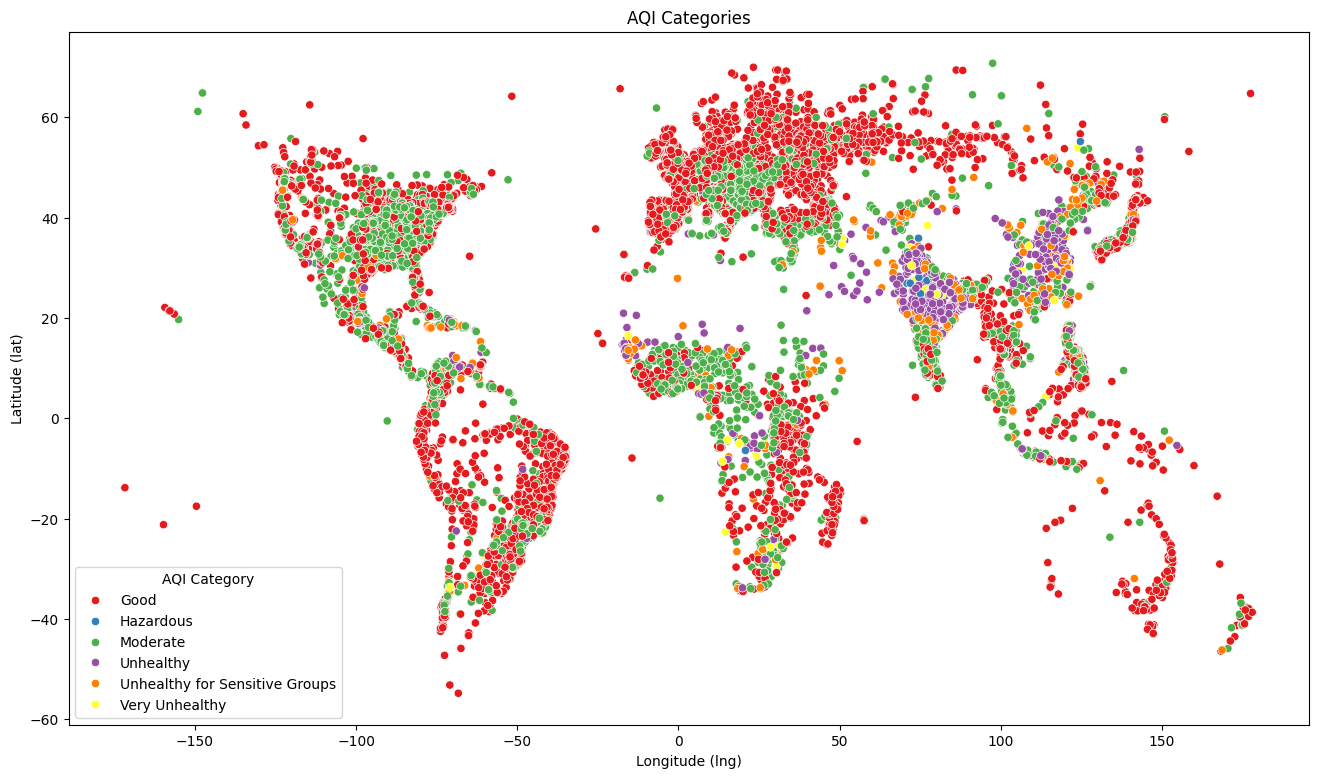

In [15]:
plt.figure(figsize = (16, 9))
sns.scatterplot(data=data_raw,x='lng',y='lat',hue='AQI Category',palette='Set1')
plt.title('AQI Categories')
plt.xlabel('Longitude (lng)')
plt.ylabel('Latitude (lat)')
plt.show()
pass

## Рассмотрим подробнее исследуемые классы

In [16]:
aqi_cnt = data_raw['AQI Category'].value_counts()
aqi_cnt

,count
AQI Category,
Good,7708
Moderate,7054
Unhealthy,871
Unhealthy for Sensitive Groups,869
Very Unhealthy,131
Hazardous,62


In [17]:
count_all = aqi_cnt.sum()
aqi_cnt / count_all * 100

,count
AQI Category,
Good,46.169512
Moderate,42.252171
Unhealthy,5.217131
Unhealthy for Sensitive Groups,5.205151
Very Unhealthy,0.784666
Hazardous,0.371369


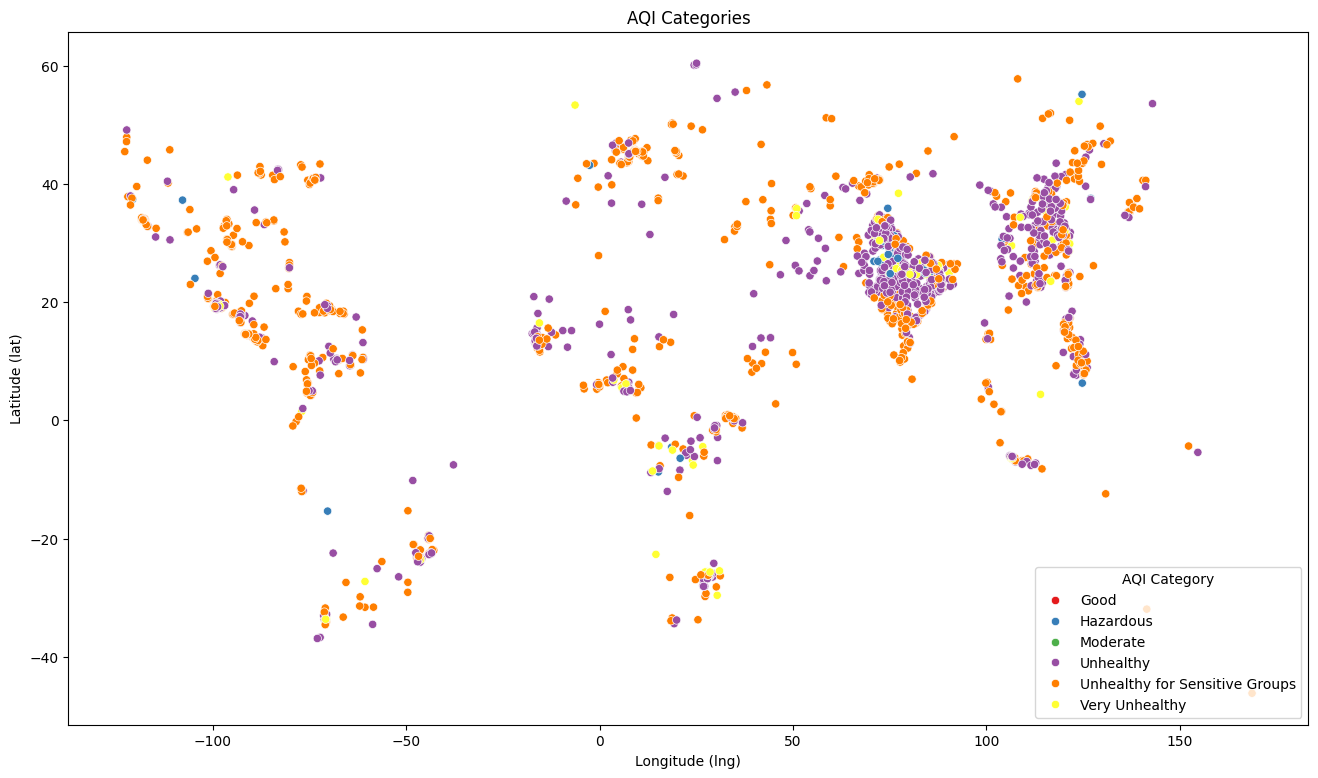

In [18]:
plt.figure(figsize = (16, 9))
sns.scatterplot(data=data_raw[~data_raw['AQI Category'].isin(['Good', 'Moderate'])],\
                x='lng',y='lat',hue='AQI Category',palette='Set1')
plt.title('AQI Categories')
plt.xlabel('Longitude (lng)')
plt.ylabel('Latitude (lat)')
plt.show()
pass

Поскольку классы `Unhealthy`, `Unhealthy for Sensitive Groups`, `Very Unhealthy`, `Hazardous` по смыслу близки, встречаются гораздо реже чем `Good` и `Moderate`, предлается, для большей сбалансированности классов, объединить их в один класс

In [19]:
data_raw['AQI Category'] = data_raw['AQI Category'].map({'Good': 'Good',\
                                                         'Moderate': 'Moderate',\
                                                         'Unhealthy': 'Unhealthy',\
                                                         'Unhealthy for Sensitive Groups': 'Unhealthy',\
                                                         'Very Unhealthy': 'Unhealthy',\
                                                         'Hazardous': 'Unhealthy'})

In [20]:
aqi_cnt = data_raw['AQI Category'].value_counts()
aqi_cnt

,count
AQI Category,
Good,7708
Moderate,7054
Unhealthy,1933


Обновленная визуализация

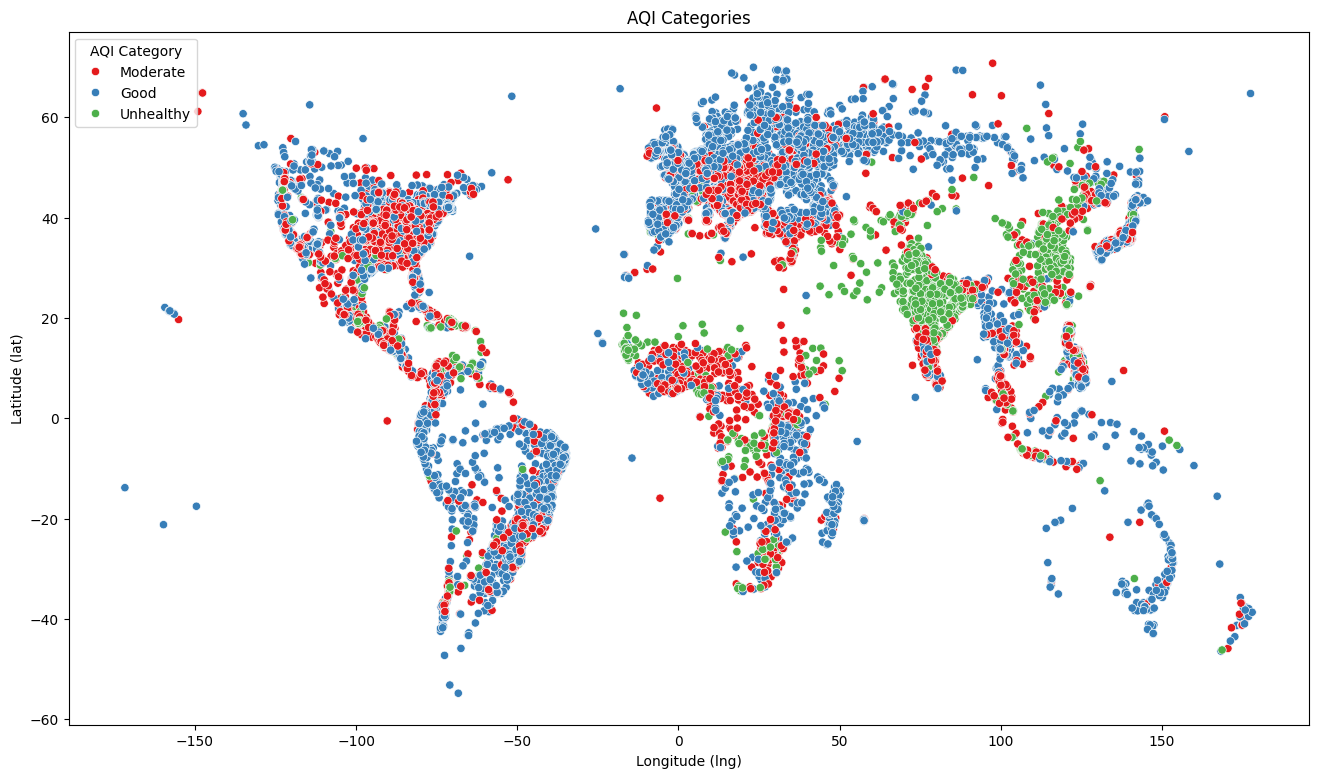

In [21]:
plt.figure(figsize = (16, 9))
sns.scatterplot(data=data_raw,x='lng',y='lat',hue='AQI Category',palette='Set1')
plt.title('AQI Categories')
plt.xlabel('Longitude (lng)')
plt.ylabel('Latitude (lat)')
plt.show()
pass

## Подготовка данных

Скопируем **data_raw** в **data**

In [22]:
data = data_raw.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Country             16393 non-null  string  
 1   City                16695 non-null  string  
 2   AQI Value           16695 non-null  int64   
 3   AQI Category        16695 non-null  object  
 4   CO AQI Value        16695 non-null  int64   
 5   CO AQI Category     16695 non-null  category
 6   Ozone AQI Value     16695 non-null  int64   
 7   Ozone AQI Category  16695 non-null  category
 8   NO2 AQI Value       16695 non-null  int64   
 9   NO2 AQI Category    16695 non-null  category
 10  PM2.5 AQI Value     16695 non-null  int64   
 11  PM2.5 AQI Category  16695 non-null  category
 12  lat                 16695 non-null  float64 
 13  lng                 16695 non-null  float64 
dtypes: category(4), float64(2), int64(5), object(1), string(2)
memory usage: 1.3+ MB


Будем решать задачу классификации для `AQI Category`.
Значения `AQI Category` и `AQI Value`, `CO AQI Category` и `CO AQI Value`, `Ozone AQI Category` и `Ozone AQI Value`, `NO2 AQI Category` и `NO2 AQI Value`, `PM2.5 AQI Category` и `PM2.5 AQI Value` связаны между собой, поэтому оставим в таблице только численные значения (и category для `AQI Category`, так как для мы собираемся классифицировать этот параметр)

In [23]:
data = data.drop(['Country', 'City', 'AQI Value', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category'],axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AQI Category     16695 non-null  object 
 1   CO AQI Value     16695 non-null  int64  
 2   Ozone AQI Value  16695 non-null  int64  
 3   NO2 AQI Value    16695 non-null  int64  
 4   PM2.5 AQI Value  16695 non-null  int64  
 5   lat              16695 non-null  float64
 6   lng              16695 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 913.1+ KB


Посмотрим на кусочек полученной таблицы

In [24]:
data.head(5)

,AQI Category,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
0,Moderate,1,36,0,51,44.7444,44.2031
1,Good,1,5,1,41,-5.2900,-44.4900
2,Good,1,5,1,41,-11.2958,-41.9869
3,Moderate,1,39,2,66,37.1667,15.1833
4,Good,1,34,0,20,53.0167,20.8833


Выполним стандартизацию параметров: признаки приведем к нулевому среднему и единичному среднеквадратичному отклонению

In [25]:
num_columns = ['CO AQI Value',	'Ozone AQI Value',	'NO2 AQI Value',	'PM2.5 AQI Value', 'lat', 'lng']
data[num_columns] = (data[num_columns] - data[num_columns].mean(axis = 0)) / data[num_columns].std(axis = 0)

In [26]:
data.head(5)

,AQI Category,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
0,Moderate,-0.144278,0.185323,-0.649525,-0.204158,0.630889,0.659220
1,Good,-0.144278,-1.171984,-0.479477,-0.435595,-1.549507,-0.555136
2,Good,-0.144278,-1.171984,-0.479477,-0.435595,-1.811227,-0.520864
3,Moderate,-0.144278,0.316675,-0.309428,0.142997,0.300668,0.261891
4,Good,-0.144278,0.097754,-0.649525,-0.921613,0.991378,0.339934


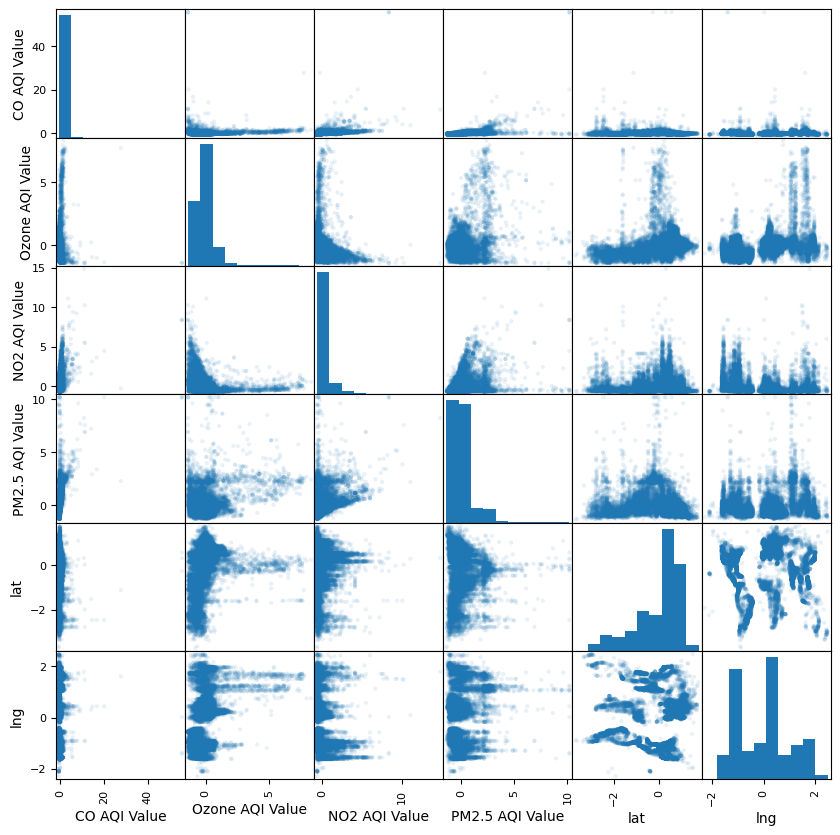

In [27]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = 0.1, figsize = (10, 10))
pass

# kNN

Для решения задачи классификации будем использовать классификатор ближайших соседей

In [28]:
from sklearn.model_selection import train_test_split

X = data.drop('AQI Category', axis = 1)
y = data['AQI Category']
feature_names = X.columns

X = X.to_numpy()
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 831, stratify = y)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

print(N_train, N_test)

13356 3339


In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.04791853848457622

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_predict)
cm

array([[1473,   69,    0],
       [  63, 1338,   10],
       [   0,   18,  368]])

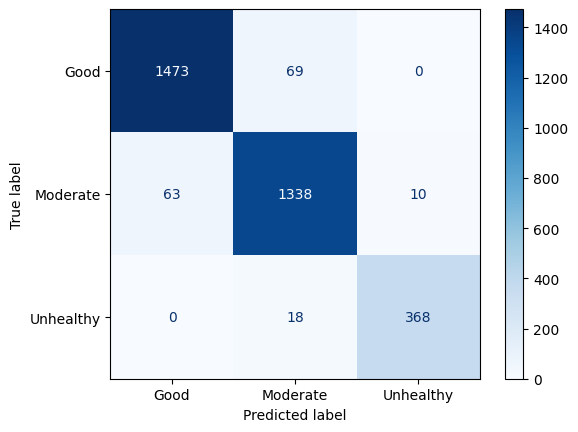

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_).plot(cmap=plt.cm.Blues)
pass

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

        Good       0.96      0.96      0.96      1542
    Moderate       0.94      0.95      0.94      1411
   Unhealthy       0.97      0.95      0.96       386

    accuracy                           0.95      3339
   macro avg       0.96      0.95      0.95      3339
weighted avg       0.95      0.95      0.95      3339



Классификатор ближайших соседей предоставляет достаточно неплохие, для нашей выборки, результаты

# Протестируем разные гиперпараметры

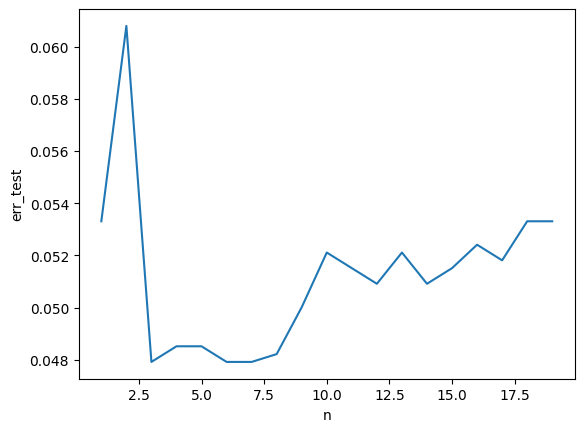

In [34]:
nrange = range(1, 20, 1)
results = []

for n in nrange:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test  != y_test_predict)
    results.append(err_test)

fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('n')
ax.set_ylabel('err_test')
plt.plot(nrange, results)
pass

При данном разделении на обучающую и тестовую выборку минимальная ошибка достигается при выборе гиперпараметра n = 3

# Lab № 4

Решим задачу кластеризации методами KMeans, DBSCAN, KMedoids

### KMeans

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

kmeans = KMeans(n_clusters=3, random_state=831)
kmeans_clusters = kmeans.fit_predict(X)

res_kmeans = adjusted_rand_score(y, kmeans_clusters)
print("res_kmeans =", res_kmeans)

res_kmeans = 0.06757322695651463


### DBSCAN


In [36]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
dbscan_clusters = dbscan.fit_predict(X)

res_dbscan = adjusted_rand_score(y, dbscan_clusters)
print("res_dbscan =", res_dbscan)

res_dbscan = 0.09356217828789529


### KMedoids

In [37]:
%pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.5 MB/s eta 0:00:00


In [38]:
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=3, random_state=831)
kmedoids_clusters = kmedoids.fit_predict(X)

res_kmedoids = adjusted_rand_score(y, kmedoids_clusters)
print("res_kmedoids =", res_kmedoids)

res_kmedoids = 0.060172422723674034


### Результаты кластеризации:

In [39]:
print("res_kmeans =", res_kmeans)
print("res_dbscan =", res_dbscan)
print("res_kmedoids =", res_kmedoids)

res_kmeans = 0.06757322695651463
res_dbscan = 0.09356217828789529
res_kmedoids = 0.060172422723674034


Применением данных алгоритмов не удалось удачно выделить кластеры, хотя методом обучения с учителем (а именно методом K ближайших соседей) удавалось получить хорошие результаты. Можно сделать вывод что данная выборка не очень подходит для задачи кластеризации
